# Self-Study OpenCV library Part 2
- Contents are from book "Ayush Vaishya - Mastering OpenCV with Python" 
- This notebook includes some notes from learning chapters with example codes. (Review purpose only)
- Includes Chapter 7 to Chapter 12. (Total 12 Chapters)

In [1]:
#check installation
import cv2
import numpy as np
import scipy
import matplotlib
#import mahotas
import sklearn
import skimage
print(cv2.__version__)
print(np.__version__)
print(scipy.__version__)
print(matplotlib.__version__)
#print(mahotas.__version__)
print(sklearn.__version__)
print(skimage.__version__)

4.9.0
1.26.4
1.12.0
3.8.3
1.4.1.post1
0.22.0


## Chap7. Edges and Contours

- Introduction to edges边缘
- Image gradients
- Filters for image gradients (Sobel filter, Scharr filter, Laplacian filter)
- Canny edge detector
- Introduction to contours轮廓
- Extracting and visualizing contours
- Contour hierarchy
- Contour moments
- Properties of contours
- Contour approximation
- Contour filtering and selection

### Introduction to edges 边缘

- Edge represents the boundary between the different regions or objects in an image.

    - Edges are characterized by a sharp contrast in pixel values and often indicate important features or structures. They are commonly represented as lines or curves and play a crucial role in many computer vision and image analysis tasks, including object detection, segmentation, and feature extraction.

- Edge detection is a fundamental technique in image processing and computer vision that aims to identify and extract the boundaries or edges of objects or regions within an image. The process of edge detection involves analyzing the changes in intensity or color values between adjacent pixels in an image.
Edge detection algorithms can be categorized into different types, such as intensity based-method gradient-based methods or Laplacian-based methods. Each algorithm has its own advantages, limitations, and parameters that can be adjusted to achieve desired edge detection results.


### Image gradients

- Image gradient is the change in directional intensity in an image or we can say that the gradients provide information about the intensity variations in an image. Image gradients are primarily used for edge detection operations.

- Image gradients are like a map that shows how steep or gentle the changes are in an image. They help us spot the edges and boundaries between objects:

  - When the gradient is high, it means there’s a quick change in color or brightness, often indicating an edge or an important detail.
  - When it’s low, it means the colors or shades are more consistent, like a smooth, flat area in the image.

So, image gradients help us find important features and shapes within pictures.

- <u>Gradient Magnitude</u>: Gradient magnitude represents the strength of the intensity change at a specific point in an image. The magnitude quantities how much the pixel values vary from one point to another in an image. A higher magnitude will denote a larger change in intensity values while a lower change will denote a small change in the intensity values.
- <img src="image_gradient.png" width="1000" height="600">

- <u>Gradient Orientation</u>: Gradient Orientation denotes the direction of change in the intensity values in an image. Gradient Orientation gives us the angle of change in intensity in an image. So if the intensity increases from left to right, the gradient orientation would be aligned with the horizontal axis (0 degrees or π radians). If the intensity decreases from top to bottom, the gradient orientation would be aligned with the vertical axis (90 degrees or π/2 radians).

- Using the gradient magnitude values of Gx and Gy, the gradient orientation in an image can be calculated using mathematical operations such as the arctan function which calculates the angle between the x and y gradient vectors.

- Thus, we can calculate the gradient direction by: $$Theta = atan(Gy, Gx)*180 / pi $$

### Filters for image gradients
#### Sobel filter

- Two kernels:
<img src="sobel_filters.png" width="600" height="400">

- The SobelX kernel calculates the image gradients in the X direction and emphasizes the vertical edges in the image. The SobelX kernel enhances vertical edges by assigning negative values to one side and positive values to the other side. This creates a larger difference in values, effectively enhancing the vertical edges in the image. This arrangement accentuates the contrast between the two sides of the vertical edges.

- Similarly, the SobelY operator calculates the image gradients in the Y direction and emphasizes the horizontal edges in an image. The SobelY kernel assigns negative and positive values but in the horizontal direction. This creates a difference in values enhancing the horizontal edges in the image, thus enhancing the contrast between the two sides of the horizontal edges.

- Together both of the kernels make an effective gradient computation mechanism effectively calculating the gradient magnitude and orientation in the image.
  
- cv2.Sobel(src, ddepth, dx, dy, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    - ddepth: Data type of the output image such as cv2.CV_64F (64-bit floating-point) or cv2.CV_16S (16-bit signed integer). The default value for this parameter will be same the data type of the input image.
    - dx: Order of the derivatives in the X direction. This can be set to 0 or 1. This is set to 1 to calculate the SobelX parameter or the gradients in the X direction.
    - dy: Order of the derivatives in the Y direction. This can be set to 0 or 1. This is set to 1 to calculate the SobelY parameter or the gradients in the Y direction.
    - (Keeping both dx and dy as 1 will calculate the full gradients for the image.)
    - ksize: Size of the Sobel Kernel to be used. The value for this parameter is an odd integer. The default value for this parameter is 3 indicating a 3x3 kernel.
    - scale: Scale factor for the computed values. The default value for this parameter is 1 meaning no scaling has been applied.
    - delta: Additional value added to the computer values. The default value for this parameter is 0.
    

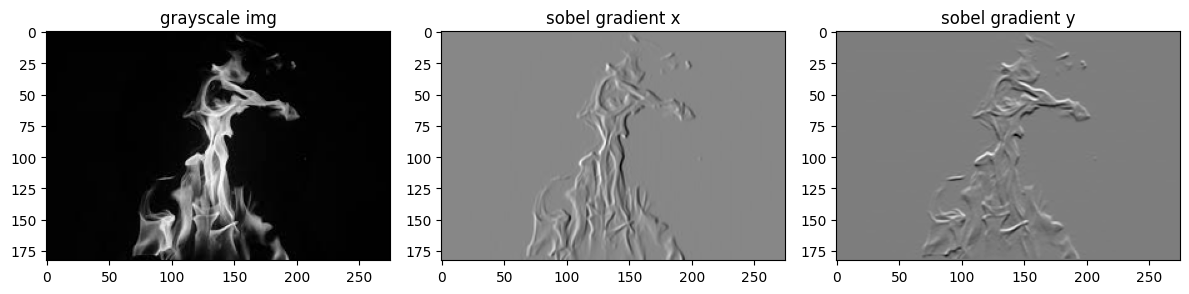

In [312]:
img = cv2.imread("Fire.jpg", cv2.IMREAD_GRAYSCALE)

#apply sobel filter
grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3) #enhance vertical lines
grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3) #enhance horizontal lines

#display
plt.figure(figsize=(12,8))
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title("grayscale img")

plt.subplot(132), plt.imshow(grad_x, cmap='gray')
plt.title("sobel gradient x")
plt.subplot(133), plt.imshow(grad_y, cmap='gray')
plt.title("sobel gradient y")
plt.tight_layout()
plt.show()

#### Scharr filter

<img src="Scharr_filter.png" width="600" height="400">

- Sobel operators and Scharr operators are both used for finding image gradients. However, Scharr operators are sometimes preferred over Sobel operators for a couple of reasons, even though they serve a similar purpose:

    - Improved sensitivity: Scharr operators are more sensitive to subtle changes in image gradients compared to Sobel operators. They can detect edges and details that Sobel might miss, making them a better choice when you need precise edge detection.
    - Better rotation invariance: Sobel operators are sensitive to the orientation of edges, which means they might perform differently depending on whether the edge is horizontal, vertical, or diagonal. Scharr operators are designed to be more rotationally invariant meaning they perform consistently across various edge orientations.

- So, while Sobel operators are quite useful for basic gradient calculations, Scharr operators offer improved accuracy and performance in scenarios were detecting fine details and dealing with edges at different angles is important.

- cv2.Scharr(src, ddepth, dx, dy, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

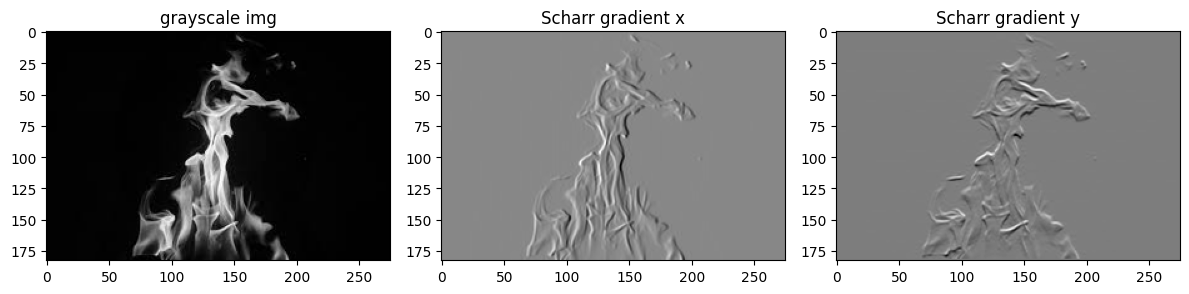

In [316]:
img = cv2.imread("Fire.jpg", cv2.IMREAD_GRAYSCALE)

#apply Scharr filter
grad_x = cv2.Scharr(img, cv2.CV_32F, 1, 0) #enhance vertical lines
grad_y = cv2.Scharr(img, cv2.CV_32F, 0, 1) #enhance horizontal lines

#display
plt.figure(figsize=(12,8))
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title("grayscale img")

plt.subplot(132), plt.imshow(grad_x, cmap='gray')
plt.title("Scharr gradient x")
plt.subplot(133), plt.imshow(grad_y, cmap='gray')
plt.title("Scharr gradient y")
plt.tight_layout()
plt.show()

#### Replace manually: cv2.filter2D()

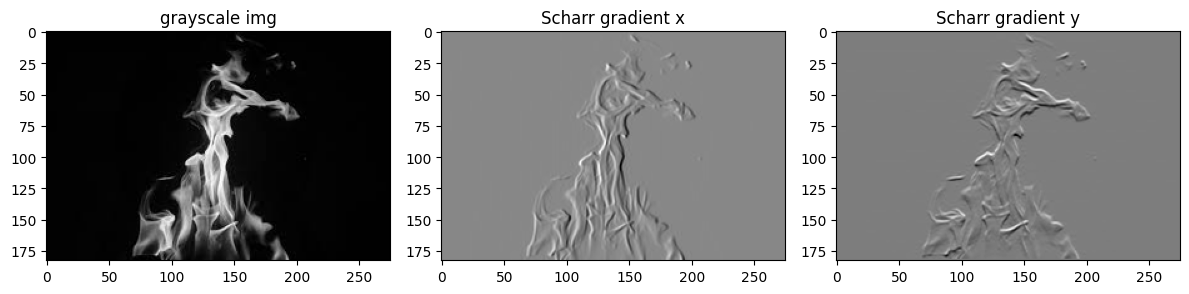

In [318]:
img = cv2.imread("Fire.jpg", cv2.IMREAD_GRAYSCALE)

#define scharr kernel
kernel_x = np.array([[-3,0,3],[-10,0,10],[-3,0,3]],dtype=np.float32)
kernel_y = np.array([[-3,-10,-3],[0,0,0],[3,10,3]],dtype=np.float32)

#use cv2.filter2D() 
grad_x = cv2.filter2D(img, cv2.CV_32F, kernel_x)
grad_y = cv2.filter2D(img, cv2.CV_32F, kernel_y)

#display
plt.figure(figsize=(12,8))
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title("grayscale img")

plt.subplot(132), plt.imshow(grad_x, cmap='gray')
plt.title("Scharr gradient x")
plt.subplot(133), plt.imshow(grad_y, cmap='gray')
plt.title("Scharr gradient y")
plt.tight_layout()
plt.show()

#### Laplacian operators

- The Laplacian operator is a <u>second-order</u> derivative operator that measures the rate of change of intensity in the image. First-order filters identify edges in an image by detecting local maximum or minimum values. In contrast, the Laplacian operator detects edges at points of inflection, which occur when the intensity value transitions from negative to positive or vice versa.

- <img src="Laplacian_filter.png" width="300" height="300">
- The Laplacian operator is represented by a 3×3 kernel and the central element of the kernel is assigned a negative value (-4 or -8) and the surrounding elements have positive values (1 or 2). This configuration enhances the edges and intensity transitions in the image.

- The Laplacian operator not only detects edges in an image but also provides additional information about the nature of these edges. It classifies edges into two types: inward edges and outward edges. Inward edges are regions where the intensity values transition from higher to lower values, while outward edges are regions where the intensity values transition from lower to higher values.

- Internally, the Laplacian operator utilizes the Sobel operator to perform its computations. The Sobel operator calculates the gradients of an image and these derivatives are then used to compute the second-order derivatives necessary for the Laplacian operators:
$$ \nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2} $$

- cv2.Laplacian(src, ddepth, ksize=1, scale=1, delta=0,
borderType=cv2.BORDER_DEFAULT)


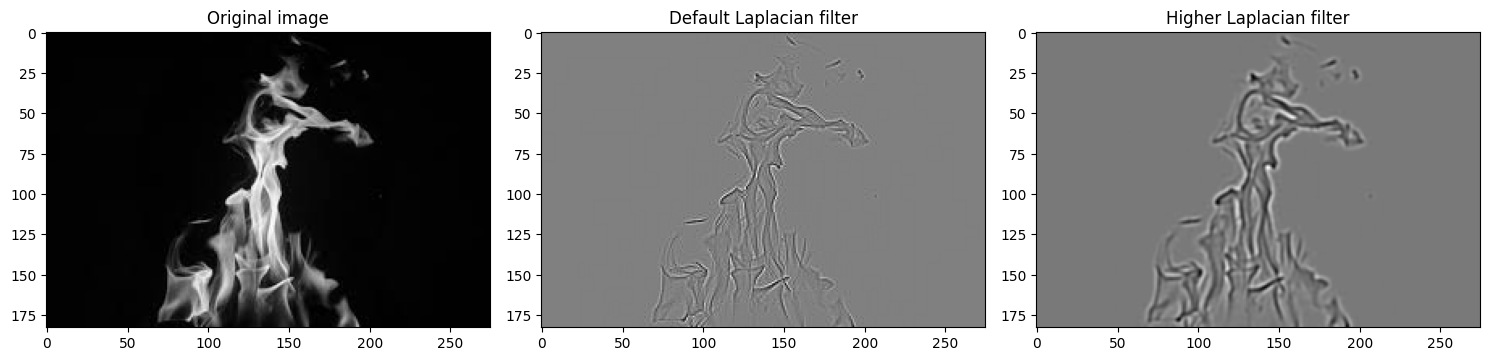

In [326]:
img = cv2.imread("Fire.jpg", cv2.IMREAD_GRAYSCALE)

#apply default laplacian ksize
lap_default = cv2.Laplacian(img, cv2.CV_64F) #default ksize=3

#apply higher laplacian ksize
lap_higher = cv2.Laplacian(img, cv2.CV_64F, ksize=7)

#display
plt.figure(figsize=(15,10))
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title("Original image")

plt.subplot(132), plt.imshow(lap_default, cmap='gray')
plt.title("Default Laplacian filter")

plt.subplot(133), plt.imshow(lap_higher, cmap='gray')
plt.title("Higher Laplacian filter")

plt.tight_layout()
plt.show()

### Canny Edge Detector

- aims to accurately identify the boundaries of objects in an image while minimizing noise and false detections.
  
- 实现原理一般为：
1. 降噪：由于边缘检测很容易受到图像噪声的影响，所以首先使用高斯滤波器对图像进行平滑处理，以减少图像噪声。- cv2.GussianBlur(image, (5,5),0)
2. 计算梯度：使用Sobel filter在水平和垂直方向上计算图像的梯度, grad_x, grad_y。然后计算边缘的强度和方向，grad_magnitude, grad_direction。
3. 非极大值抑制：算法遍历图像的每一个像素并去除那些非边缘的像素（即不是梯度最大的像素）。
4. 双阈值：应用两个阈值（一个低阈值和一个高阈值）来确定真实的边缘。强度高于高阈值的像素被认为是强边缘。强度在两个阈值之间的像素会被进一步检查，如果它们与强边缘像素相连，则被认为是边缘，否则被抑制。
5. 边缘跟踪：通过抑制弱非边缘，并将弱边缘连接到强边缘，最终确定图像中的边缘。

- 以上步骤（手动）比较复杂, 用function替代: cv2.Canny(image, threshold1, threshold2, edges, apertureSize=3, L2gradient=false)
    - threshold1: Lower threshold value. Any gradient value below threshold1 is considered a non-edge and will be discarded. If the parameter is explicitly set to threshold1=None, it will default to the value of 100.
    - threshold2: Higher threshold value. Any gradient value above threshold2 is considered a strong edge and will be preserved. TIf the parameter is explicitly set to threshold1=None, it will default to the value of 200.

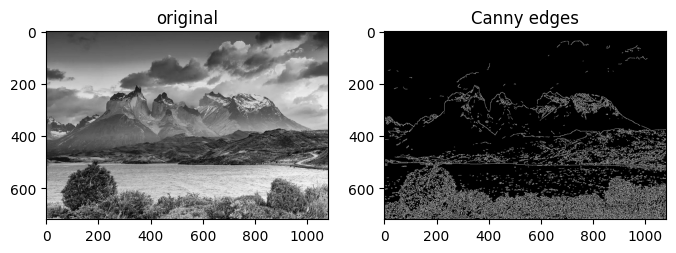

In [331]:
img = cv2.imread("mountain.jpg", cv2.IMREAD_GRAYSCALE)

#apply canny (default threshold1=100, threshold2=200)
edges = cv2.Canny(img, threshold1=200, threshold2=300)

#display
plt.figure(figsize=(8,6))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title("original")
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title("Canny edges")
plt.show()

### Introduction to contours 轮廓

- Contours play a crucial role in computer vision. Contours provide a way to extract the shape and boundary information of objects within an image. They are widely used for object detection and recognition tasks, where the goal is to identify and locate specific objects or patterns in an image.
- Contours can be leveraged for image segmentation tasks as they can help separate objects from the background or each other. By analyzing various properties of contours such as shape, area, or perimeter among many others, we can generate a lot of insights about the objects in an image.
- Overall, The analysis and interpretation of contours enable advanced computer vision systems to understand and interact with the visual world more effectively.

### Contour hierarchy

- The contour hierarchy is represented by a NumPy array, where each element corresponds to a contour. Each contour element contains four values:
    - hierarchy[i][0]：后一个轮廓的索引。如果不存在，则为-1。
    - hierarchy[i][1]：前一个轮廓的索引。如果不存在，则为-1。
    - hierarchy[i][2]：第一个子轮廓的索引。如果没有子轮廓，则为-1。
    - hierarchy[i][3]：父轮廓的索引。如果没有父轮廓，则为-1。
 
例如
- Contours: [0, 1, 2]
- Hierarchy: [[-1,- 1,1,-1],[-1,-1,-1,0],[-1,0,-1,-1]]
- 当在图像中查找轮廓时，你可能会遇到一些轮廓完全包含在其他轮廓内。例如，有一个轮廓代表一个字符的外形，而另一个轮廓表示字符内部的空心部分（如字母 'O' 或 'A'）。轮廓层次结构就是用来描述这种父子关系的，它告诉我们哪些轮廓是其他轮廓的父轮廓，哪些是子轮廓，以及它们是如何嵌套的。

#### cv2.findContour()
contours, hierarchy = cv2.findContours(image, mode, method)
- image
- mode：轮廓检索模式，它决定了我们将检索哪些轮廓。不同模式如下：
  - cv2.RETR_EXTERNAL：只检索最外层的轮廓。
  - cv2.RETR_LIST：检索所有轮廓，而不创建父子关系。
  - cv2.RETR_CCOMP：检索所有轮廓，并将它们组织成两级层次结构。
  - cv2.RETR_TREE：检索所有轮廓，并重建完整的嵌套轮廓层次结构。
- method：轮廓逼近方法。它决定了如何储存轮廓的角点。
    - cv2.CHAIN_APPROX_NONE：储存轮廓上所有的点。
    - cv2.CHAIN_APPROX_SIMPLE：仅储存轮廓的拐点信息，压缩水平、垂直和对角线段，只留下它们的结束点。

#### cv2.drawContour()
- cv2.drawContours(image, contours, contourIdx, color=(0,0,255), thickness=1, lineType=cv2.LINE_8, hierarchy=None, maxLevel=sys.maxsize, offset=(0,0))
    - contourIdx: the index of contours to be drawn. -1: draw all contours

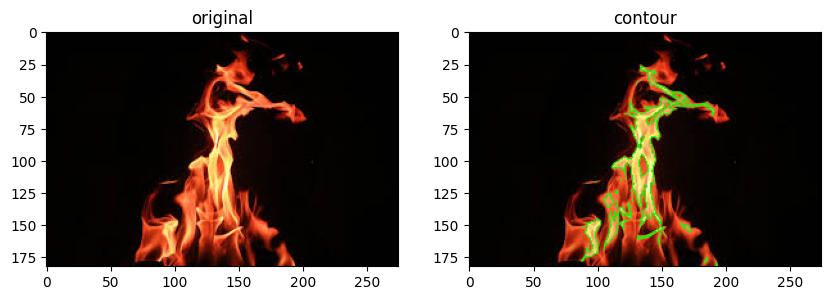

In [345]:
img = cv2.imread("Fire.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#apply binary threshold 
_, threshold = cv2.threshold(gray, 150,255, cv2.THRESH_BINARY)

#find contours
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#create a copy image to display contours
new_img = img.copy()

#draw contours
cv2.drawContours(new_img, contours, -1, (0,255,0), 
                 thickness=1, lineType=cv2.LINE_8)

#convert to rgb
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
new_img_rgb = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)

#display
plt.figure(figsize=(10,8))
plt.subplot(121), plt.imshow(img_rgb)
plt.title("original")
plt.subplot(122), plt.imshow(new_img_rgb)
plt.title("contour")
plt.show()

### Contour moments

- Contour moments are statistical measures that describe various characteristics of a contour or shape. These moments provide valuable information about the spatial distribution, size, shape, and orientation of objects in an image.

- By analyzing contour moments, we can extract important features and properties of objects, which can be used for various tasks such as object recognition, shape matching, and classification.

- cv2.Moments(contour) 
    - 返回的M是一个字典，包含了所有矩的值。
    - 最常用的矩是：
        - M['m00']：零阶矩，等于轮廓区域的面积。"Area"
        - M['m10']、M['m01']：一阶矩，与轮廓的质心的位置有关。"Centroid"
        - M['mu20']、M['mu11']、M['mu02']：中心矩，与轮廓形状的方向有关。
          
### Properties of Contours

#### Area 
- cv2.contourArea(contour) 计算边缘面积
#### Perimeter
- cv2.ArcLength() 计算边缘周长
#### Centroid
- centroid_x = int(M['m10']/M['m00'])
- centroid_y = int(M['m01']/M['m00'])

Area:  21836
Perimeter:  719
Centroid (x, y):  171 456
Area:  56078
Perimeter:  885
Centroid (x, y):  423 304
Area:  37636
Perimeter:  775
Centroid (x, y):  136 133


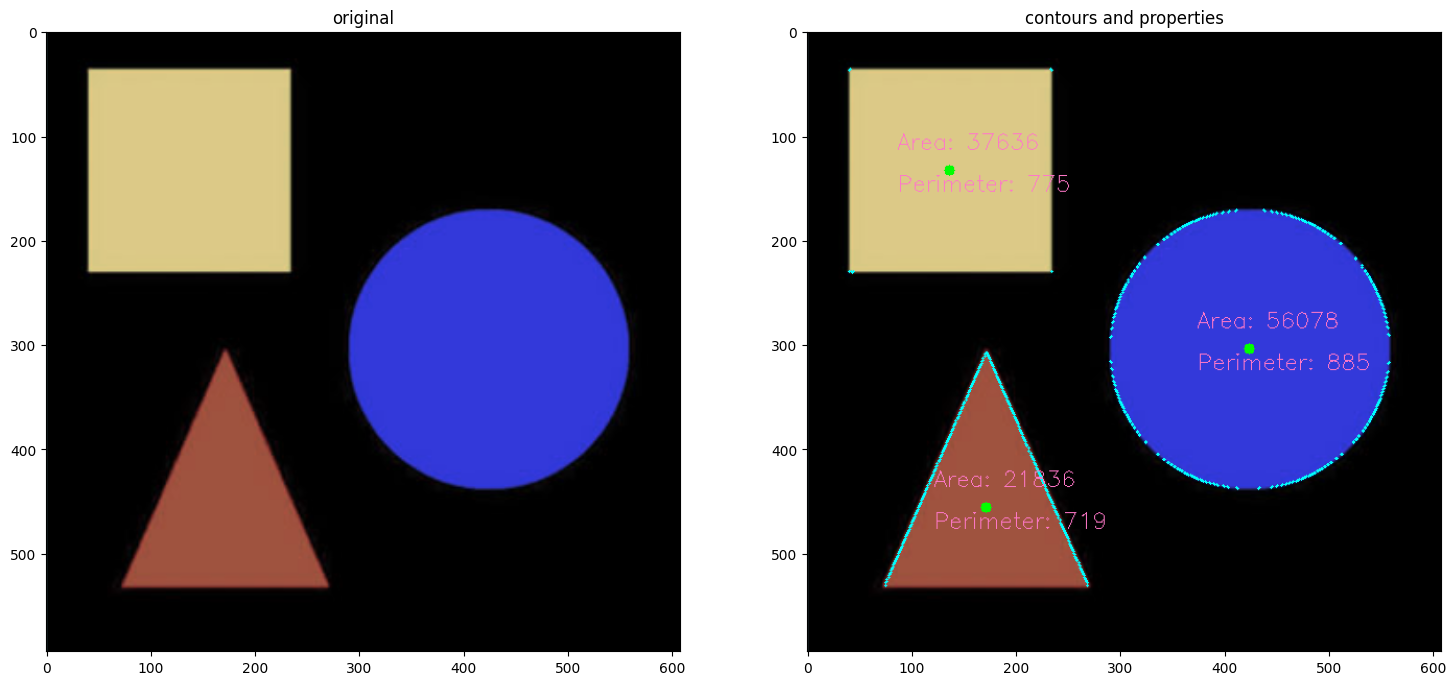

In [367]:
#Example: use three properties to draw them

img = cv2.imread("object.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img1 = img.copy()

#binary threshold
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_OTSU)

#find contours of objects
contours, _=cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#iterate contours
for contour in contours:
    #Area
    area = int(cv2.contourArea(contour))
    
    #Perimeter
    p = int(cv2.arcLength(contour, True))
    
    #Centroids of object
    M = cv2.moments(contour)
    centroid_x = int(M['m10']/M['m00'])
    centroid_y = int(M['m01']/M['m00'])
    
    #print properties
    print("Area: ", area)
    print("Perimeter: ", p)
    print("Centroid (x, y): ", centroid_x, centroid_y)

    #Draw the contours, centroids, with text on the image
    cv2.drawContours(img1, contour, -1, (0,255,255),2)
    cv2.circle(img1, (centroid_x, centroid_y), 5, (0,255,0),-1)
    cv2.putText(img1, f"Area: {area}", (centroid_x-50, centroid_y-20),
               cv2.FONT_HERSHEY_SIMPLEX,0.7, (255,120,200),1)
    cv2.putText(img1, f"Perimeter: {p}", (centroid_x-50, centroid_y+20),
               cv2.FONT_HERSHEY_SIMPLEX,0.7, (255,120,200),1)

#display drawing
plt.figure(figsize=(18,10))
plt.subplot(121), plt.imshow(img)
plt.title("original")
plt.subplot(122), plt.imshow(img1)
plt.title("contours and properties")
plt.show()

#### Bounding rectangle

cv2.boundingRect(contour)

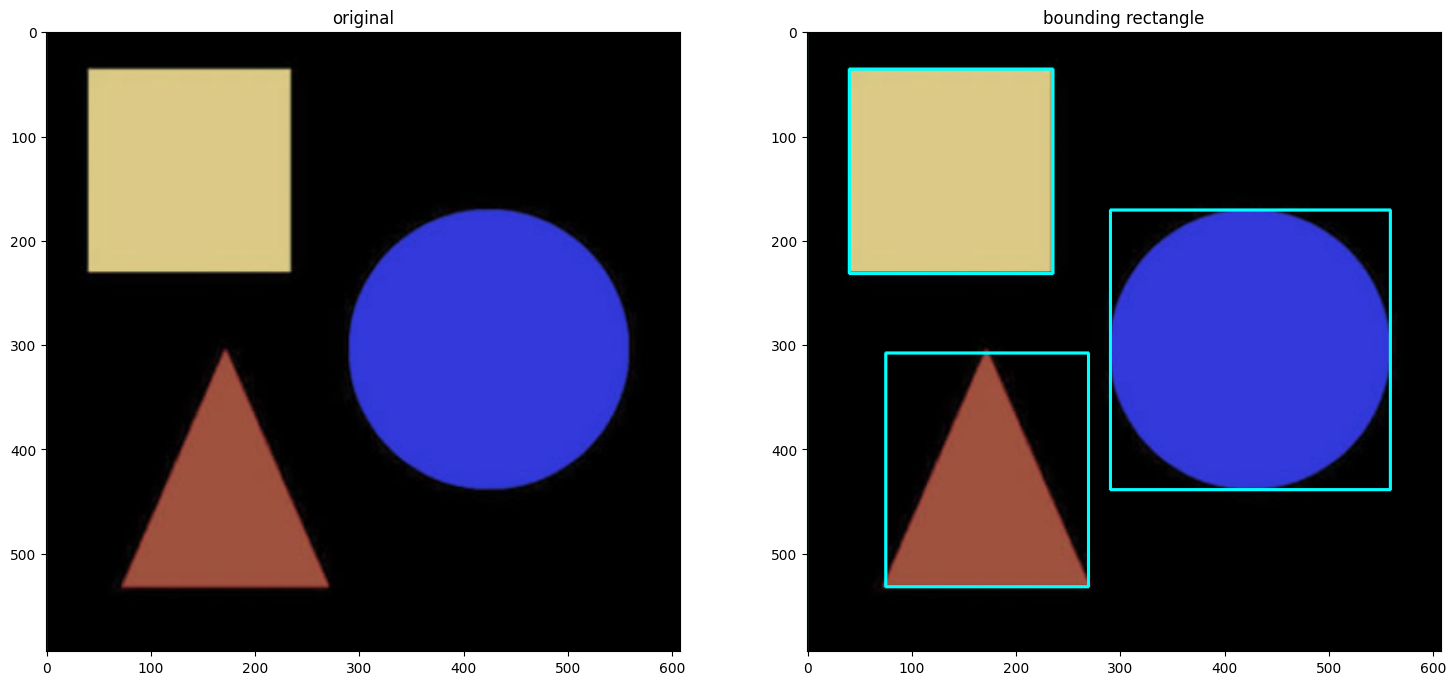

In [368]:
img = cv2.imread("object.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = img.copy()

#binary threshold
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_OTSU)

#find contours of objects
contours, _=cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    #find the pts of bounding rectangle
    x, y, w, h = cv2.boundingRect(contour)

    #draw rectangle
    cv2.rectangle(img2, (x, y), (x+w, y+h), (0,255,255),2)

#display drawing
plt.figure(figsize=(18,10))
plt.subplot(121), plt.imshow(img)
plt.title("original")
plt.subplot(122), plt.imshow(img2)
plt.title("bounding rectangle")
plt.show()

#### cv2.minAreaRect()
- ((x,y), (width,height), angle) = cv2.minAreaRect(points)
- calculates the minimum area bounding box for a given contour.
- 
#### cv2.boxPoints()

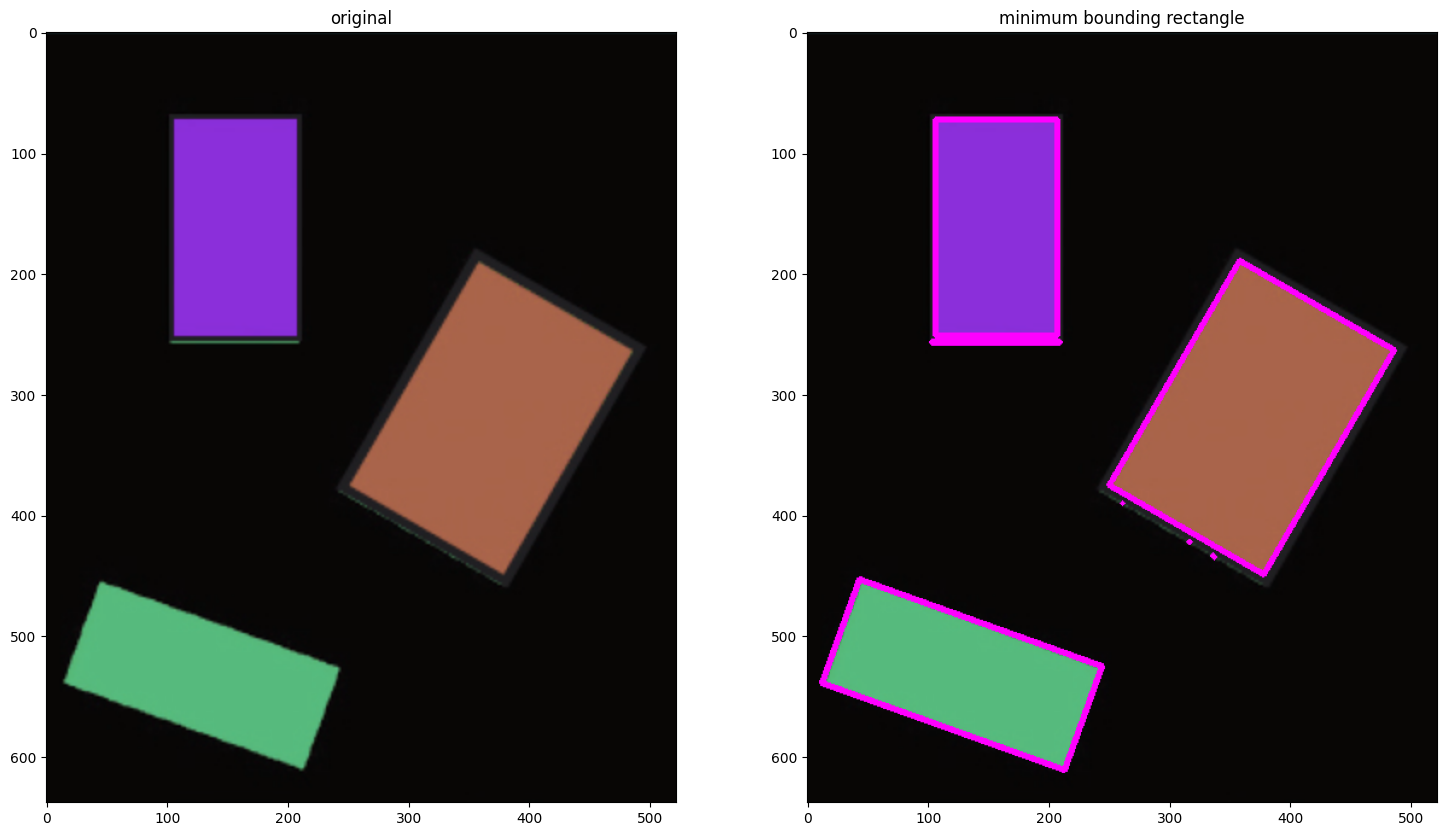

In [375]:
img = cv2.imread("object_rect.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img3 = img.copy()

#binary threshold
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_OTSU)

#find contours of objects
contours, _=cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    #find the min rectangle
    rect = cv2.minAreaRect(contour)

    #draw a rectangle around the object
    box = cv2.boxPoints(rect)
    box = np.intp(box)

    #draw the minimum contour in the image
    cv2.drawContours(img3, [box],0, (255,0,255),3)

#display drawing
plt.figure(figsize=(18,10))
plt.subplot(121), plt.imshow(img)
plt.title("original")
plt.subplot(122), plt.imshow(img3)
plt.title("minimum bounding rectangle")
plt.show()

#### Aspect ratio

- aspect ratio: 宽高比是对象边界矩形的宽度和高度之比。这是一个用于描述轮廓形状的简单比例，可以帮助识别对象的形状特征。
- $$Aspect_Ratio = width/height$$

#### Extent 

- extent: 轮廓面积与其边界矩形面积的比例。
- 用来评估轮廓内部空间的充实程度。
- 例如，如果一个轮廓是一个实心的矩形，则其extent将接近1。如果轮廓内部有很多空白区域（比如字母“O”的中心），extent值将小于1。
- $$Extent = area/RectArea$$

2
2
1
2
1


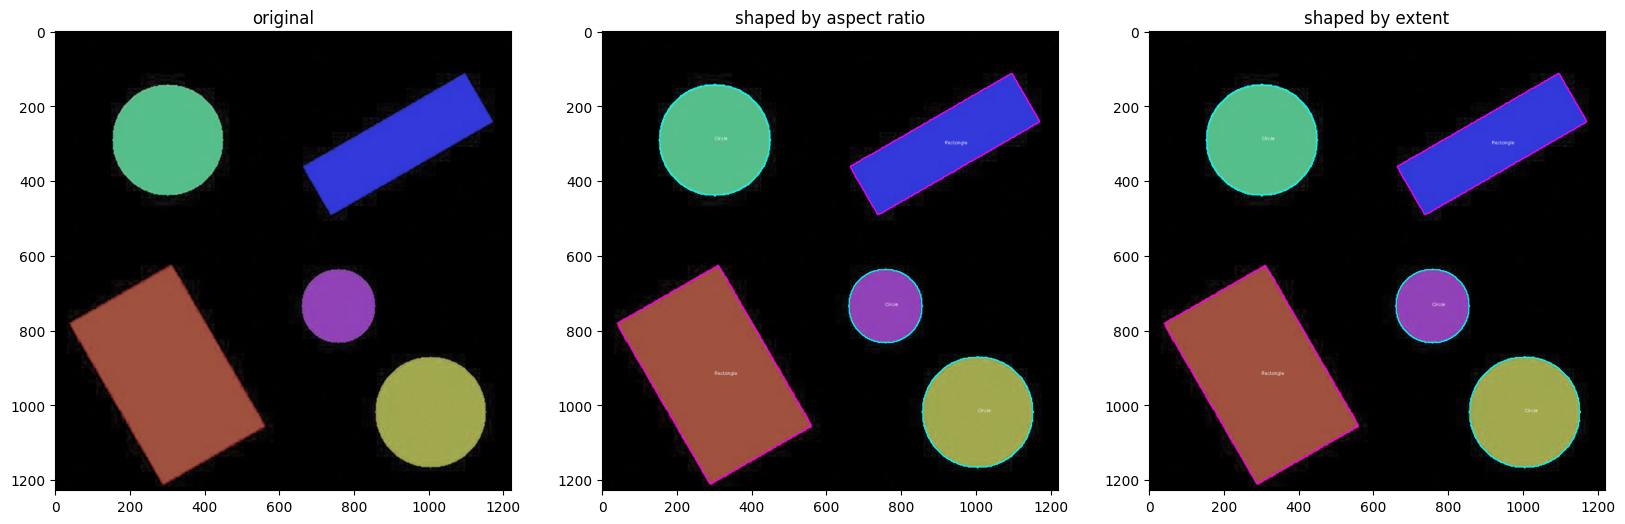

In [379]:
img = cv2.imread("object2.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img4 = img.copy()
img5 = img.copy()

#binary threshold
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_OTSU)

#find contours of objects
contours, _=cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    #find the min rectangle
    rect = cv2.minAreaRect(contour)
    x, y = rect[0]
    w, h = rect[1]
    #aspect ratio
    aspect_ratio = int(w)/int(h)

    #extent
    area = cv2.contourArea(contour)
    bounding_area = w*h
    extent = area/bounding_area
    
    #Classify object based on aspect ratio in img4
    if aspect_ratio >= 1.05 or aspect_ratio <=0.95:
        # Rectangle
        cv2.drawContours(img4, [contour], 0, (255, 0, 255), 2)
        cv2.putText(img4, 'Rectangle', (int(x), int(y)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)
    else:
        # Circle
        cv2.drawContours(img4, [contour], 0, (0, 255, 255), 2)
        cv2.putText(img4, 'Circle', (int(x), int(y)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255),1)

    # Classify object based on extent in img5
    if extent <= 1.05 and extent >= 0.95:
        # Rectangle
        print(1)
        cv2.drawContours(img5, [contour], 0, (255, 0, 255), 2)
        cv2.putText(img5, 'Rectangle', (int(x), int(y)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)
    else:
        # Circle
        print(2)
        cv2.drawContours(img5, [contour], 0, (0, 255, 255), 2)
        cv2.putText(img5, 'Circle', (int(x), int(y)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255),1)

#display drawing
plt.figure(figsize=(20,15))
plt.subplot(131), plt.imshow(img)
plt.title("original")
plt.subplot(132), plt.imshow(img4)
plt.title("shaped by aspect ratio")
plt.subplot(133), plt.imshow(img5)
plt.title("shaped by extent")
plt.show()

### Contour Approximation 
- a technique used to simplify representation of contours of objects in an image. 
- aims to simplify the contours by reducing the number of points needed to describe them. It does that by smoothing out the contours and removing unnecessary details thus making it simpler to describe them.
- The process aims to keep the original shape and important features of the contours while removing any small irregularities from the contours.

- Steps:
1. extract contours
2. set approximation accuracy
3. contour approximation algorithm

- cv2.approxPolyDP(curve, epsilon=0.01, closed=True)
    - Parameters:

        - curve: Input contour.
        - epsilon: Maximum distance between the original curve and its approximation. Default value for this parameter is 0.01.
        - closed: A boolean value indicating whether the curve is closed or not. Default value for this parameter is True indicating a closed curve.

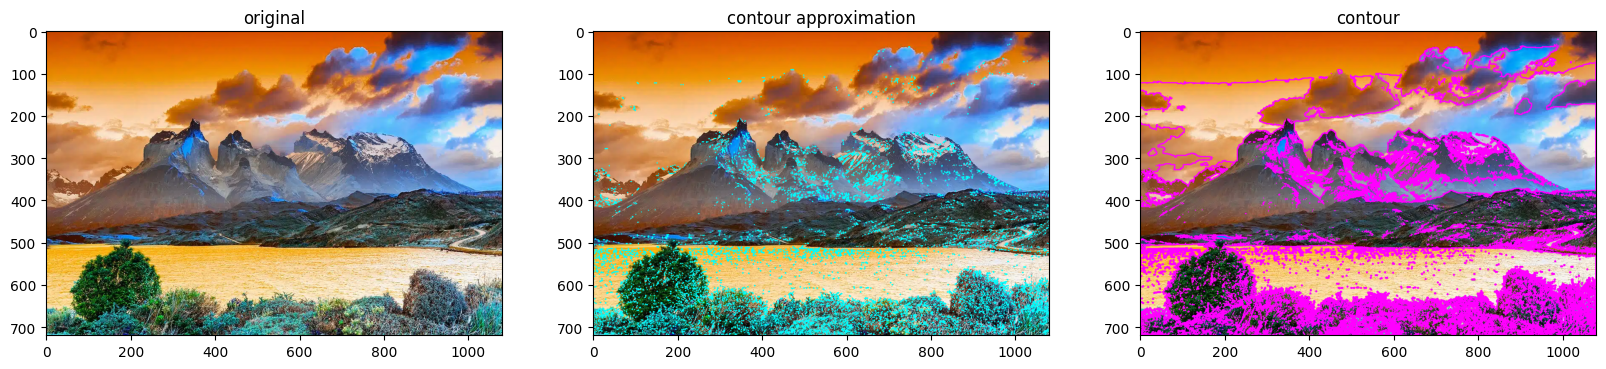

In [386]:
img = cv2.imread("mountain.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img6 = img.copy()
img7 = img.copy()

#binary threshold
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

#find contour
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    #perform approximation
    epsilon = 0.5 * cv2.arcLength(contour, True) #higher epsilon, more accurate approximation
    approx = cv2.approxPolyDP(contour, epsilon, False) #higher epsilon, more accurate approximation

    #draw contour to copy image
    cv2.drawContours(img6, [approx], -1, (0,255,255),2)
    cv2.drawContours(img7, [contour], -1, (255,0,255),2)

#display drawing
plt.figure(figsize=(20,15))
plt.subplot(131), plt.imshow(img)
plt.title("original")
plt.subplot(132), plt.imshow(img6)
plt.title("contour approximation")
plt.subplot(133), plt.imshow(img7)
plt.title("contour")
plt.show()

### Contour Filtering and Selection 

Apply filters to reduce unwanted contours:
- Area-based filtering: This technique involves filtering contours based on their area. Contours with areas below or above certain thresholds can be discarded, helping to remove noise or small irrelevant regions.
- Perimeter-based filtering: This technique filters contours based on their perimeter. Contours with perimeters outside a specified range can be removed, effectively eliminating contours that are too small or too large.
- Aspect Ratio filtering: Contours can be filtered based on their aspect ratio and is useful for selecting contours that exhibit specific elongation or compactness characteristics.
- Shape property filtering: Technique using various other properties discussed earlier such as convex hull, extent and solidity as well to filter contours. Filtering can be done on contours based on these properties allowing for selecting contours that meet specific shape criteria.

Use this image to reduce noise by contour filtering:

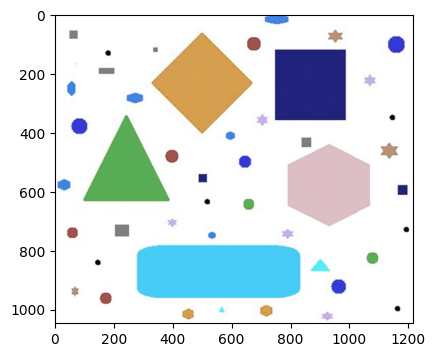

In [394]:
img = cv2.imread("contour_filters.png")
plt.figure(figsize=(6,4))
plt.imshow(img)
plt.show() 

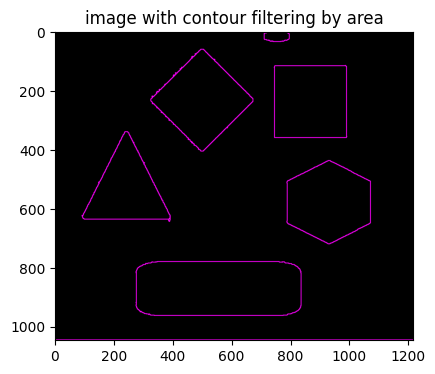

In [408]:
img = cv2.imread("contour_filters.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#binary threshold
_, threshold = cv2.threshold(gray, 150, 255, cv2.THRESH_TRIANGLE)

#find contours
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#set contour filters by area
filtered_contours = []
filtered_objects = []

for contour in contours:
    area = cv2.contourArea(contour)
    if area>3500: 
        filtered_contours.append(contour)
        x, y, w, h = cv2.boundingRect(contour)
        filtered_objects.append(img[y:y+h, x:x+w])
    #print(len(filtered_contours))

    #create a blank image
    result = np.zeros_like(img)

    #draw contours on new image
    cv2.drawContours(result, filtered_contours, -1, (255,0,255),2)

#display
plt.figure(figsize=(6,4))
plt.imshow(result)
plt.title("image with contour filtering by area")
plt.show() 

## Chap8. Machine Learning with Images

- Introduction to Machine Learning
- KMeans Clustering
- k-Nearest Neighbors Classification
- Logistic Regression (省略)
- Decision Trees (省略)
- Random Forests (省略)
- Support Vector Machines (省略)
* (省略) - see ML Textbook

### Intro to ML

Topcis to highlight: (ignore here)
- Supervised, Unsupervised, Semi-supervised learning
- Terms: Features, Labels, Training/Validation/Testing sets
- Bias, Variances
- Overfitting, Underfitting matters
- Evaluation metrics: Confusion Matrix (TP, TN, FP, FN - Accuracy, Precision, Recall, F1-score)
- Hyperparameter tuning

### KMeans Clustering

- iterative unsupervised algorithm
- clustering data points to k clusters
- centroid-based, calculated mean values of all data points in a cluster

1. random initialization
2. cluster assign (each data point assigned to nearest centroid)
3. update centroids (re-calculate mean value)
4. convergence

- Some applications use clustering on images:
    - Image segmentation
    - Image retrieval恢复
    - Content-based image retrieval
    - Image Annotation
 
- <u>cv2.kmeans(data, K, bestLabels, criteria, attempts, flags, centers)</u>
    - criteria （终止条件）: Algorithm termination criteria for the k-means algorithm. This argument is a tuple consisting of three values (type, max_iter, epsilon).

        - type: Specifies the type of termination criteria. It has three possible values:
            - cv2.TERM_CRITERIA_EPS: The algorithm stops iterating when the desired accuracy (epsilon) is reached.
            - cv2.TERM_CRITERIA_MAX_ITER: The algorithm stops iterating when the specified maximum number of iterations (max_iter) is reached.
            - cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER: The algorithm stops iterating when either of accuracy or maximum number of iterations is reached.
        - max_iter: The maximum number of iterations allowed for the k-means algorithm. The algorithm will terminate when the number of iterations reaches this value regardless if it has converged or not.
        - epsilon: Desired accuracy for algorithm convergence.
    - flags:
        - cv2.KMEANS_RANDOM_CENTERS
        - cv2.KMEANS_PP_CENTERS (better than random to convergence)

- output:
    - retval: sum of squared distances (data point to center)
    - labels: each cluster
    - centers: cluster center

Image segmentation using Kmeans (Clustering based)

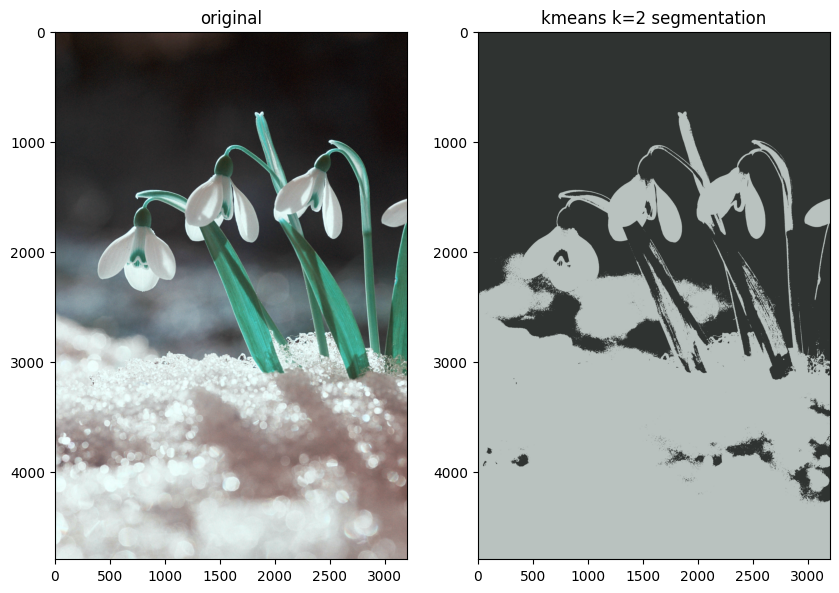

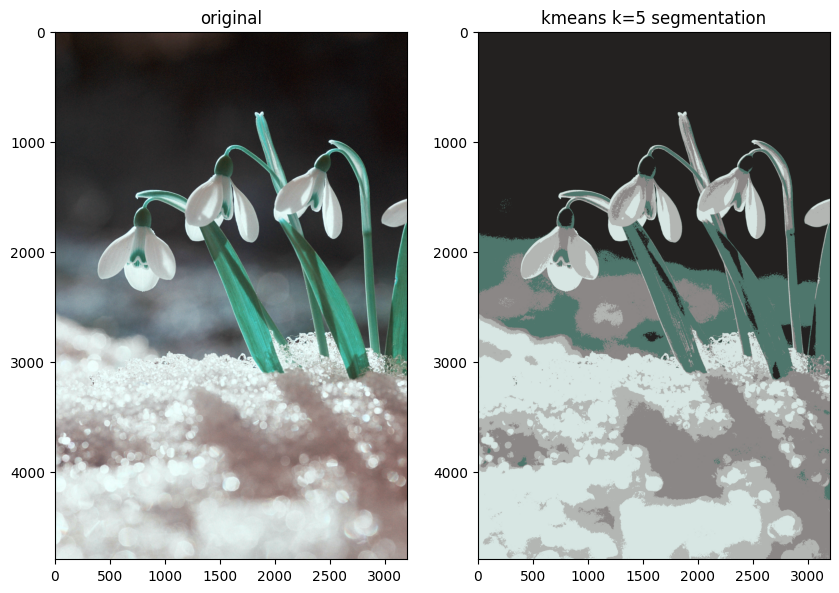

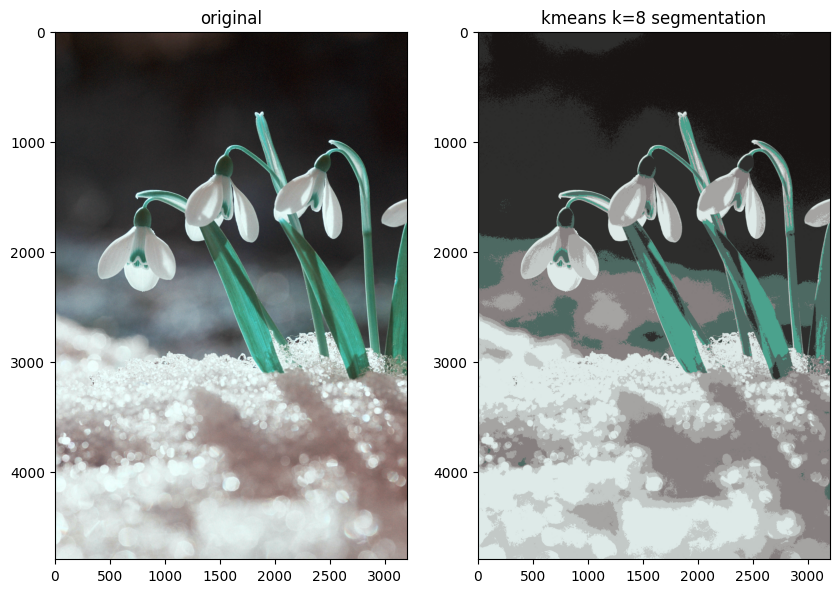

In [411]:
img = cv2.imread("Flower.jpg")

#reshape pixels to 2D array
pixels = img.reshape(-1,3).astype(np.float32)

#define criteria for kmeans （type, max_iter, epsilon)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.8)

#set k values
k_values=[2,5,8]

#perform kmeans
for k in k_values:
    _, labels, centers = cv2.kmeans(pixels, k, 
                                    None, criteria, 
                                    10, cv2.KMEANS_PP_CENTERS)
    #convert centers to uint8
    centers = np.uint8(centers)

    #replace each pixel value with its cluster centers value
    seg_img = centers[labels.flatten()]
    seg_img = seg_img.reshape(img.shape)

    #display
    plt.figure(figsize=(10,8))
    plt.subplot(121), plt.imshow(img)
    plt.title("original")
    plt.subplot(122), plt.imshow(seg_img)
    plt.title(f"kmeans k={k} segmentation")
    plt.show()

### KNN
- popular supervised algorithm used fo classification/regression
- predict the class/value of a new data point based on majority or mean of its K nearest neighbors
- "non-parametric"  (no assumptions about underlying data and instead makes predictions based on the similarity between the input data points and the train labeled data.)
- "instance-based"

- The k-NN classification algorithm works by implementing the following steps:

    1. Choose K. Load the dataset and feature scaling.
    2. Split this data into training and test sets. 
    3. Calculate its distance to all data points in the training set.(Euclidean distance/ Manhattan distance
    4. (Iteration)select the K nearest neighbors to the data point. The K nearest points to the data point will be selected.
    5. (Iteration)Among the selected K nearest neighbors the class label is assigned to the data point based on the majority voting in its selected neighbors.
    6. Steps 4 and 5 are repeated for all the data points in the test set.
    7. The model is then evaluated using various evaluation metrics such as accuracy or precision. Depending on the results obtained, the performance of the model can be improved by changing the K value or the distance metrics.

- Feature scaling
    - Normalization (min-max scaling)
    - Standardization (z-score normalization)

KNN algorithm with MNIST dataset

Validation Accuracy: 0.9715
Test Accuracy: 0.967
Predicted Labels: [5 6 0]


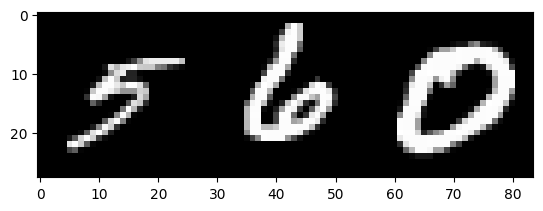

In [413]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf

mnist = tf.keras.datasets.mnist

# Load the Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten the images
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the KNN classifier
knn = KNeighborsClassifier()

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = knn.predict(X_val)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", val_accuracy)

# Make predictions on the test set
y_pred_test = knn.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

# Select three random test images
indices = np.random.randint(0, len(X_test), size=3)
images = X_test[indices]
predicted_labels = y_pred_test[indices]

# Preprocess the images
reshaped_images = [cv2.cvtColor(image.reshape(28, 28), cv2.COLOR_GRAY2BGR) for image in images]

# Concatenate the images horizontally
concatenated_image = np.hstack(reshaped_images)

print("Predicted Labels:", predicted_labels)

#display
plt.imshow(concatenated_image)
plt.show()

## Chap9. Advanced Computer Vision Algorithms

- FAST (Features from Accelerated Segment Test)
- Harris Keypoint Detector
- BRIEF (Binary Robust Independent Elementary Features)
- ORB (Oriented FAST and Rotated BRIEF)
- SIFT (Scale-Invariant Feature Transform)
- RootSIFT (Root Scale-Invariant Feature Transform)
- SURF (Speeded-Up Robust Features)
- Local Binary Patterns
- Histogram of Oriented Gradients

### FAST
- Features from Accelerated Segment Test
- designed to identify the corners or the key points in an image quickly with high accuracy. The algorithm works by analyzing the intensity variations in pixels of an image to detect key points or corners.
- main advantage: compute effeciency -> real-time performance 
- <b>object recognition and image stitching</b>
- FAST的工作原理是：
    1. choose pixel (p)
    2. set threshold value (t)
    3. 在像素p周围考虑一个圆形邻域，通常是半径为3的16个像素点。
    4. if p_new > p+t, p_new为bright_pixel; if p_new < p-t, p_new为dark_pixel
    5. pixel classification
    6. 为了提高算法的性能，FAST采用了一个决策树来快速判断邻域像素是否满足上述条件。
- cv2.FastFeatureDetector_create()
- 非极大值抑制（Non-Maximum Suppression，NMS）是一种图像处理技术，用于在特征检测（如边缘检测、角点检测）后减少特征点的数量。其基本思想是在一个局部邻域内只保留最强的特征点，而抑制（即消除或置为零）那些非最大的特征点，从而达到特征点稀疏化的目的。
    - 非极大值抑制也是物体检测算法（如R-CNN系列）中的一个重要步骤，用于在候选物体边界框（bounding boxes）中选择最佳的边界框，消除多余的重叠框。在这种情况下，一般根据边界框的置信度或者预测概率来执行NMS。

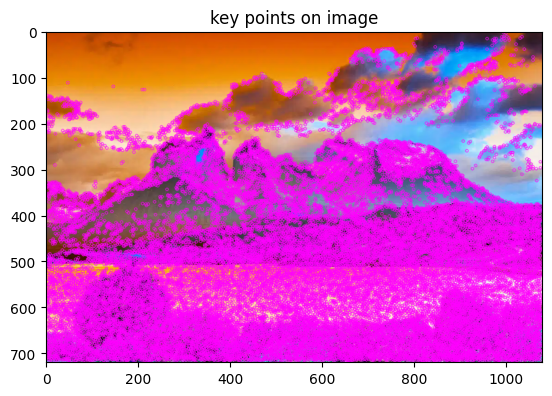

In [418]:
img = cv2.imread("mountain.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#create a FAST detect object
fast = cv2.FastFeatureDetector_create()

#detect points using fast object
keypoints = fast.detect(gray, None)

#draw keypoints to new image
new_img = cv2.drawKeypoints(img, keypoints, None, (255,0,255))

#display
plt.imshow(new_img)
plt.title("key points on image")
plt.show()

### Harris Keypoint Detector

- Harris corner detection is a popular algorithm used to identify keypoint locations in an image. It is based on the concept of corner points, which are areas where the image intensity changes significantly in multiple directions.
- These corner points are considered distinctive features that can be used for various computer vision tasks, such as image matching and object recognition.
- Steps:
    1. gradient calculation: e.g. sobel filter
    2. stucture tensor calculation: The structure tensor is generated by calculating the products of the gradients at each pixel and summing them over a local neighborhood. It provides information about the image’s local structure and orientation.
    3. Corner Response Calculation: The corner response is computed using the structure tensor. It measures the likelihood of a pixel being a corner point based on the variations in intensity and gradient direction. It is calculated using the eigenvalues of the structure tensor. High eigenvalues indicate corners, while low eigenvalues represent flat or edge regions.
    4. Non-Max Suppression: To eliminate multiple corner responses in close proximity, non-maximum suppression is applied. This step ensures that only the strongest corner responses are selected as keypoints.
    5. Thresholding: Finally, a threshold is applied to the corner responses to filter out weak corners.
 
- cv2.cornerHarris(src, blockSize, ksize, k, borderType=cv2.BORDER_DEFAULT)
    - blockSize: Neighborhood size to be considered for corner detection. Commonly used values are 2, 3, or 5.
    - ksize: It determines the size of the Sobel kernel for computing image derivatives. The value of ksize is typically taken as 3, which corresponds to a 3x3 Sobel kernel.
    - k: The Harris detector free parameter. This parameter affects the sensitivity of the corner detection. Smaller values of k result in more corners being detected, while larger values make the detection stricter. It is a value in the range of [0.04, 0.06].

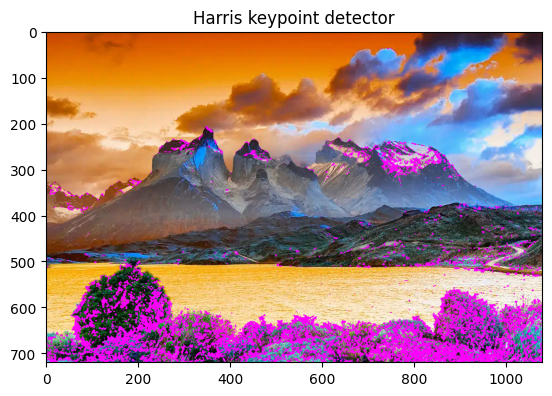

In [421]:
img = cv2.imread("mountain.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#define parameters
block_size = 3
ksize = 3
k=0.04

#Harris corner detection
corners = cv2.cornerHarris(gray, block_size, ksize, k)

#threshold and mark the detected corners
threshold = 0.01* corners.max()
new_img = img.copy()
new_img[corners>threshold] = [255,0,255]

#display
plt.imshow(new_img)
plt.title("Harris keypoint detector")
plt.show()

### BRIFF

- BRIEF（Binary Robust Independent Elementary Features）是一种用于计算机视觉任务的特征描述符。它是由Michael Calonder, Vincent Lepetit, Christoph Strecha和Pascal Fua在2010年提出的。BRIEF是一种非常高效的方法，它为特征点生成一个短的二进制字符串描述符，这在匹配特征点时非常有用。
- cv2.ORB_create()
- BRIEF的主要步骤包括：
    1. 关键点检测：首先，使用任何标准的角点检测器（如FAST、Harris等）来检测图像中的关键点。
    2. 平滑处理：由于BRIEF对噪声比较敏感，通常在计算描述符之前对图像进行高斯平滑。
    3. 选择测试点对：在关键点的周围选择一组像素点对。这些点对是随机选取的，但遵循某种预定义的分布（如高斯分布）。
    4. 强度比较测试：对于每个点对，比较关键点邻域内两个像素点的强度值。如果第一个点的强度大于第二个点，则测试的结果为1，否则为0。这样，对于每个关键点，通过执行多个这样的强度比较测试，就可以生成一个二进制字符串。
    5. 生成描述符：将所有测试的结果串联起来形成一个二进制字符串。这个字符串就是BRIEF描述符。描述符的长度通常是256、512或1024位。
- BRIEF描述符的主要优点是：
    1. 计算效率高：由于BRIEF基于简单的二进制测试，因此非常快速，非常适合在实时系统中使用。
    2. 内存占用小：BRIEF生成的是二进制字符串，相比于其他特征描述符如SIFT和SURF，其占用的内存较小。
    3. 方便匹配：使用汉明距离可以快速匹配BRIEF描述符，因为汉明距离只需要计算两个二进制字符串之间的位不同的数量。
- 然而，BRIEF的缺点是：
    1. 不是尺度不变的：BRIEF不具备尺度不变性，因此在处理具有不同尺度的图像时，效果不佳。
    2. 不是旋转不变的：原始的BRIEF也不具备旋转不变性，但后来的一些改进版本（如ORB，即Oriented FAST and Rotated BRIEF）引入了对旋转不变性的支持。
- BRIEF因其高效性而被广泛用于各种实时视觉任务，如特征匹配、图像拼接和目标跟踪。

In [426]:
cv2.imwrite("Blackcat_crop.jpg",crop_img)

True

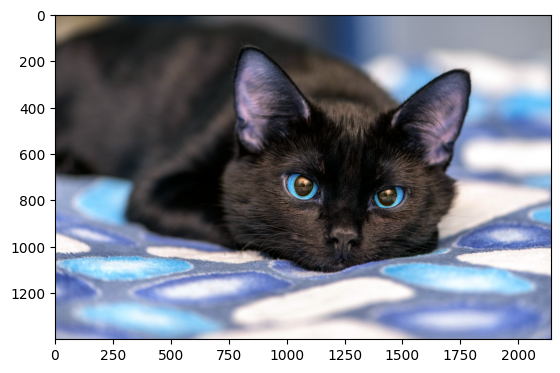

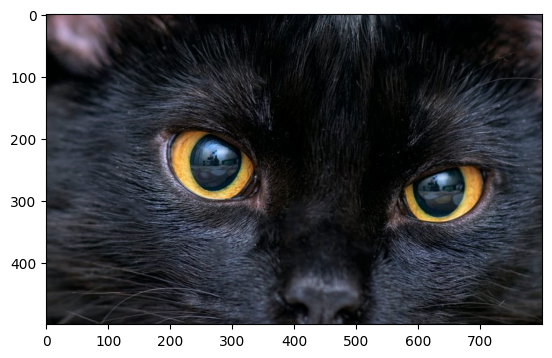

In [427]:
bc = cv2.imread("Blackcat.jpg")
plt.imshow(bc)
plt.show()
plt.imshow(crop_img)

In [429]:
img1 = cv2.cvtColor(bc, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)

#initiate ORB object
orb = cv2.ORB_create()

#set the ORB to BRIFF
orb.setScoreType(cv2.ORB_FAST_SCORE)

#detect keypoints and compute descriptions using ORB
kp1, d1 = orb.detectAndCompute(img1, None)
kp2, d2 = orb.detectAndCompute(img2, None)

#create a BFMatcher
matches = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = matches.match(d1, d2)

# Sort matches by score
matches = sorted(matches, key=lambda x: x.distance)

# Draw top matches
matched_image = cv2.drawMatches(img1, kp1, img2, kp2, 
                                matches[:10], None, 
                                flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

cv2.imwrite('brief.jpg', matched_image)

True

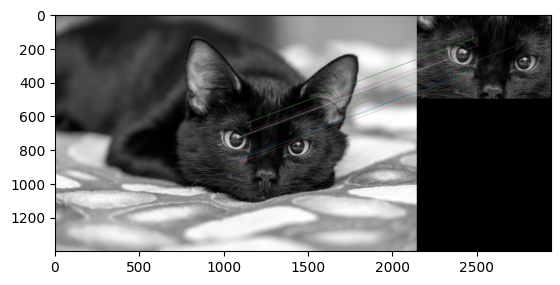

In [430]:
plt.imshow(matched_image)
plt.show()

### ORB

内容省略，only copy codes here.
- ORB is a feature detection and description algorithm that combines the FAST algorithm for keypoint detection and the BRIEF algorithm for feature description.

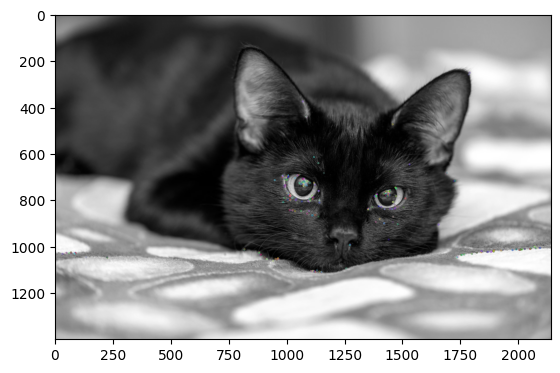

In [431]:
image = cv2.imread('Blackcat.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=0)

#display
plt.imshow(image_with_keypoints)

### SIFT

内容省略，only copy codes here.

- SIFT is a widely used feature detection and description algorithm used in computer vision and image processing. SIFT is a local invariant descriptor, implying that it describes local image features that are invariant to changes in image transformations such as rotation and image scaling.
- The SIFT algorithm is also robust to changes in lighting and can handle noise and the occlusions in an image, making it a popular algorithm to be used for various applications such as object recognition, image matching, and image stitching amongst many others.

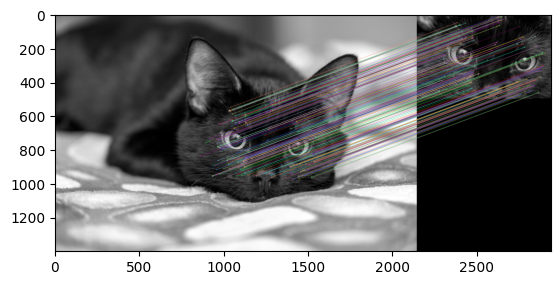

In [436]:
image1 = cv2.cvtColor(bc, cv2.COLOR_BGR2GRAY)
image2 = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Create a BFMatcher object
matcher = cv2.BFMatcher()

# Match descriptors
matches = matcher.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.05 * n.distance:
        good_matches.append(m)


# Draw matches
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

#display
plt.imshow(matched_image)
plt.show()

### RootSIFT

内容省略，only copy codes here.

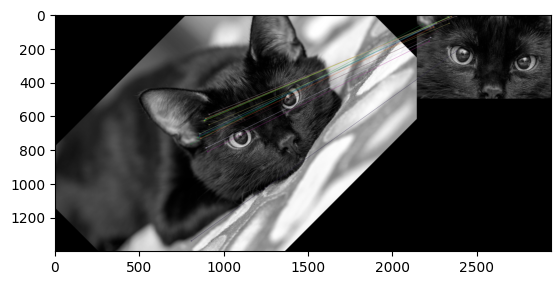

In [437]:
image1 = cv2.cvtColor(bc, cv2.COLOR_BGR2GRAY)
image2 = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)

# Rotate image
angle = 45  
rows, cols = image1.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
rotated_image = cv2.warpAffine(image1, rotation_matrix, (cols, rows))
image1 = rotated_image.copy()

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Compute RootSIFT descriptors
epsilon = 1e-7  # Small constant to avoid division by zero
descriptors1 /= (descriptors1.sum(axis=1, keepdims=True) + epsilon)
descriptors1 = np.sqrt(descriptors1)

descriptors2 /= (descriptors2.sum(axis=1, keepdims=True) + epsilon)
descriptors2 = np.sqrt(descriptors2)

# Create a BFMatcher object
matcher = cv2.BFMatcher()

# Match descriptors
matches = matcher.knnMatch(descriptors1, descriptors2, k=2)

# Filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

good_matches = good_matches[:15]

# Draw matches
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

#display
plt.imshow(matched_image)
plt.show()

### SURF

内容省略，only copy codes here.

In [438]:
image = cv2.imread('Blackcat.jpg', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize the SURF detector and descriptor
surf = cv2.SURF_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = surf.detectAndCompute(gray, None)

# Get the total number of keypoints
num_keypoints = len(keypoints)

# Print the number of keypoints
print("Number of keypoints:", num_keypoints)

# Print the size of the descriptors
descriptor_size = descriptors.shape[1]
print("Descriptor size:", descriptor_size)

AttributeError: module 'cv2' has no attribute 'SURF_create'

## Chap10. Neural Network 

（省略，很少opencv内容; Coding in "Deep Learning Specialty Course 4" ）
- Introduction to Neural Networks
- Design of a Neural Network
- Activation Functions
- Training a Neural Network
    - Forward Propagation
    - Backpropagation
- Gradient Descent
- Convolutional Neural Network
- Layers in a CNN
- First Neural Network Model
- Convolutional Neural Network Architectures
    - LeNet
    - AlexNet
    - VGGNet
- Transfer Learning
- Advanced CNN Architectures
    - GoogleNet
    - ResNet

## Chap11. Object Detection Using OpenCV

- Introduction to object detection
- Detecting objects using sliding windows
- Template matching using OpenCV
- Haar cascades
- Feature extraction for object detection
- Facial landmarks with DLIB
- Object tracking using OpenCV

### Intro to object detection

- Capable of recognizing and identifying the presence of a certain object in an image
- accurately predict the exact location of an object in an image.
- work by drawing bounding boxes around the predicted objects to accurately localize and identify them within an image or a video sequence.
- enabled us to develop a wide range of applications such as video surveillance, augmented reality, retail analytics, and industrial automation, among others.
  
- Applications -> autonomous driving capabilities. Object recognition has enabled vehicles to identify and respond to traffic signs, pedestrians, and other vehicles. This has led to enhanced safety and improved efficiency in transportation systems.

- Challenges: can be due to variations in object appearance such as
    - scale variations,
    - cluttered backgrounds
    - object occlusion.
    - variations in lighting conditions, camera viewpoint and improper picture resolution. 

### Detecting objects using sliding windows

- use sliding windows to scan and traverse through objects in the hope of finding the object we want to detect.
- By incrementally shifting the window and analyzing each subregion we can effectively detect objects of interest within the image.
- We will use a comparison mechanism, such as Euclidean distance between our object and frame in consideration.

- float('inf') 表示一个无限大的浮点数。它用来表示一个比任何其他实数都大的值。
- float('-inf') 表示负无穷大，即一个比任何其他实数都小的值。

0.5
0.75
1.0
1.25
1.5


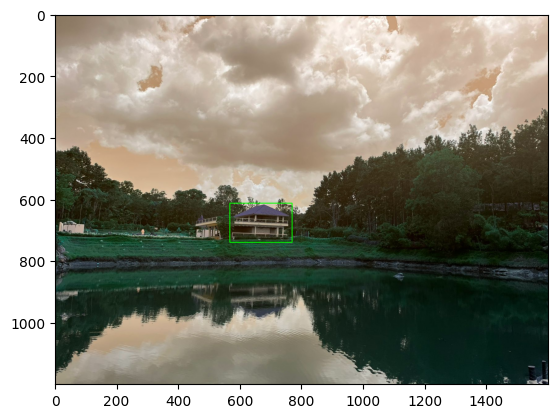

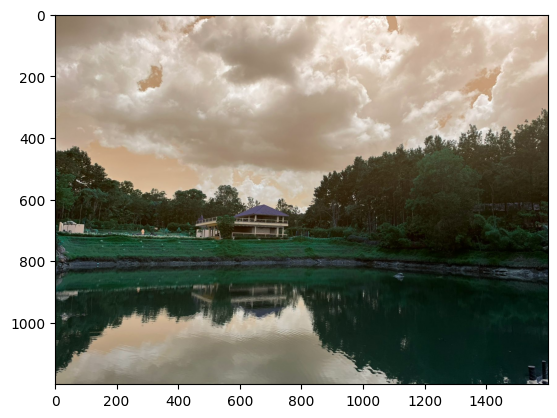

In [443]:
source_image = cv2.imread('scene.jpg')
template = cv2.imread('house.jpg')
detect_img = source_image.copy()

# Define a range of scales to consider
scales = np.linspace(0.5, 1.5, 5)

# Variables to store best case values
best_match_value = float('inf') 
best_match_location = (0, 0)
best_scale = 1.0 

for scale in scales:
    print(scale)
    # Resize the template according to the current scale
    scaled_template = cv2.resize(template, None, fx=scale, fy=scale)
    
    template_height, template_width = scaled_template.shape[:2]

    for y in range(0, source_image.shape[0] - template_height):
        for x in range(0, source_image.shape[1] - template_width):
            region = source_image[y:y + template_height, x:x + template_width]
            
            # Mean squared difference between the region and template
            diff = np.sum((region - scaled_template)**2)
            
            if diff < best_match_value:
                best_match_value = diff
                best_match_location = (x, y)
                best_scale = scale

# Actual size of the detected object
detected_width = int(template.shape[1] * best_scale)
detected_height = int(template.shape[0] * best_scale)

#draw best bounding box
cv2.rectangle(detect_img, best_match_location, 
              (best_match_location[0] + detected_width, best_match_location[1] + detected_height), 
              (0, 255, 0), 2)

#display
plt.imshow(detect_img)
plt.show()
plt.imshow(source_image)
plt.show()

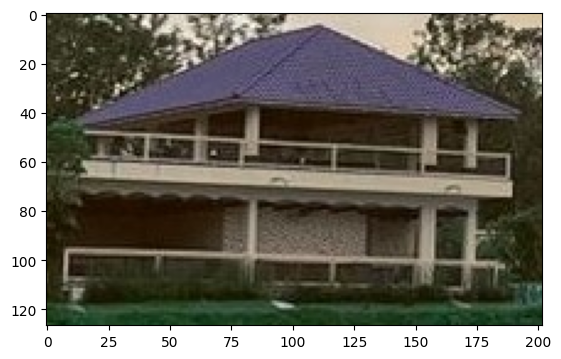

In [444]:
plt.imshow(template) 

Limitations:
- For one, it takes a lot of computational time to compare objects at each position and each scale in the original image.
- Also, we are not sure of the scale of the object in the original image and this logic might fail to identify the object properly if the scales variable here is not initialized properly.
- This method is not robust with variations in scale, rotations, lighting, or occlusions.

### Template matching using OpenCV

- Template matching is a fundamental concept in object detection that involves using a predefined template image and searching the target image to find instances that match its characteristics.
- The sliding window we discussed in the last code can also be considered a template matching code, as it involves the basic process of searching for a template image in the target image and finding the best match.
- Here, we will use OpenCV’s in-built function for template matching. This function eliminates the need to build custom sliding windows and while the function also slides the template over the target image, it works much faster in comparison.

    - cv2.matchTemplate(image, template, method=cv2.TM_SQDIFF, mask=None)
 
        - method: The comparison method calculates similarity scores. The options for this parameter are:

            - cv2.TM_SQDIFF: Sum of squared differences. - Default Value
            - cv2.TM_CCORR: Cross-correlation.
            - cv2.TM_CCOEFF: Cross-correlation coefficient.
            - cv2.TM_CCORR_NORMED: Normalized cross-correlation.
            - cv2.TM_CCOEFF: Cross-correlation coefficient.
            - cv2.TM_CCOEFF_NORMED: Normalized cross-correlation coefficient.
        - mask: Optional mask

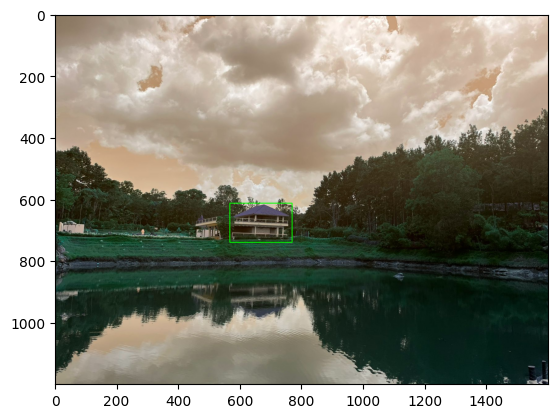

In [446]:
source_image = cv2.imread('scene.jpg')
template = cv2.imread('house.jpg')
detect_img = source_image.copy()

# Save width and height of template
template_height, template_width = template.shape[:2]

# Template matching
result = cv2.matchTemplate(source_image, template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Get the top-left corner of the detected area
top_left = max_loc

# Get the bottom-right corner of the detected area
bottom_right = (top_left[0] + template_width, top_left[1] + template_height)

cv2.rectangle(detect_img, top_left, bottom_right, (0, 255, 0), 2)

#display
plt.imshow(detect_img)
plt.show()

This was a very simple way to detect objects in our images. However, it is important to remember that template matching will struggle with significant variations in scale, rotation, lighting conditions, and complex scenes. The comparison method used might also influence the detection results.

### Haar cascades

- Haar cascade detection, also known as the Viola-Jones algorithm after its inventors Paul Viola and Michael Jones revolutionized real-time object detection.
- The algorithm gained prominence in face detection for its ability to rapidly detect faces in images. Owing to its versatility and capabilities, the applications for this algorithm have since expanded to meet various demands.
- One of the main reasons for its popularity is the efficiency and the speed it promises. This is primarily due to the use of Haar-Like features and cascade of classifiers.
- Haar-like features: Haar-like features are simple rectangular patterns used in the Haar Cascade algorithm for object detection. Inspired by the Haar wavelet transform, these features capture basic visual patterns, such as edges, lines, and corners in an image.
- Haar-like features consist of rectangular regions of different sizes and positions within an image. These features focus on differences in pixel intensities between light and dark subregions in each rectangle. The Haar Cascade algorithm uses three main types of Haar-like features: edge features, line features, and four-rectangle features:
- <img src="harr_like features.png" width="600" height="400">
- By calculating the difference in pixel intensities within these rectangular regions, the algorithm can efficiently capture important visual characteristics of objects. This makes them good at detecting objects in images.
- Cascade of classifiers: A cascade of classifiers is a smart strategy used in object detection to quickly find objects while efficiently using computer resources. Each filter in the cascade eliminates parts of the image that are less likely to contain the object. It starts with quick and simple checks to reject obviously non-object areas, saving time. As the image goes through each filter, the computer becomes more confident about whether it found the object or not. This step-by-step process makes object detection faster and more accurate.
- These features are aggregated and combined using machine learning techniques like AdaBoost to create a strong classifier capable of distinguishing between objects and non-object regions.
- Haar classifiers are now used for techniques like face detection and object recognition.

- There are several pre-trained Haar cascades available as an open-source for various object detection tasks. Some of the commonly available options are:

    - Face detection:
        - haarcascade_frontalface_default.xml: Detects frontal faces.
        - haarcascade_smile.xml: Detects smiles within faces.
        - haarcascade_eye.xml: Detects eyes within faces.
    - Full body and pedestrian detection:
        - haarcascade_fullbody.xml: Detects full human bodies.
        - haarcascade_upperbody.xml: Detects upper human bodies.
        - haarcascade_lowerbody.xml: Detects lower human bodies.
        - haarcascade_pedestrian.xml: Detects pedestrians.
    - Car detection:
        - haarcascade_car.xml: Detects cars.

- The XML files represent the trained Haar cascade classifiers and can be found at OpenCV’s GitHub repository (https://github.com/opencv/opencv/tree/master/data/haarcascades) and other online sources. These files can be downloaded and used for our applications without any restrictions.

Note:
- “Cascade”这个词在Cascade Classifier中指的是决策阶段的级联方式。在这种分类器中，对象检测是通过一系列的筛选阶段（或称为分类器）来完成的，每个阶段都会判断图像的一个区域是否可能包含我们想要检测的对象。
- 这里的“级联”是指这些分类器是按顺序排列的，如同瀑布的层层叠叠。具体来说，每个分类器都会对图像的区域进行快速检查，并决定是否需要进一步详细地检查：
1. 快速拒绝 - 在级联的早期阶段，如果一个区域很可能不包含对象，它将被快速排除。这允许算法不必对整个图像进行复杂的计算，从而节省了大量的资源和时间。
2. 逐步细化 - 只有那些通过了前一个分类器检查的区域才会传递到下一个分类器进行更细致的检查。每通过一级，检查就会变得越来越细致。
3. 累积检查 - 每个级联阶段都会积累前一个阶段的检查结果。随着级联的深入，误报的概率逐渐降低，因为只有真正可能包含对象的区域才会到达级联的更深层次。
- 通过这种方式，级联分类器能够在保持高检测速度的同时，逐渐提高对对象的检测精度。这也是为什么这种方法特别适合实时检测任务，例如在视频流中快速检测人脸。每一级分类器都像是一个关卡，只有"可能"包含对象的图像区域才能通过，直到最终确定检测结果。这种级联的机制使得分类过程非常高效，因为它可以快速排除大量非目标区域，而只对少数有希望的候选区域进行深入分析。
- official tutorial: https://docs.opencv.org/4.x/db/d28/tutorial_cascade_classifier.html

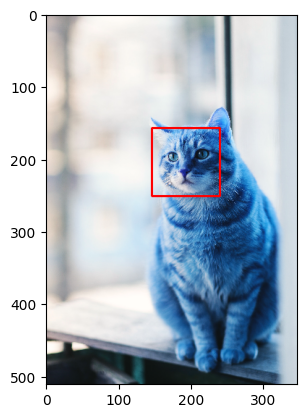

In [450]:
# Loading pre-trained cat face cascade
cat_face_cascade = cv2.CascadeClassifier('haarcascade_frontalcatface.xml')

image_path = 'cat.png'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_cascade = image.copy()

# Perform cat face detection
cat_faces = cat_face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

for (x, y, w, h) in cat_faces:
    cv2.rectangle(image_cascade, (x, y), (x + w, y + h), (255, 0, 0), 2)

#display
plt.imshow(image_cascade)
plt.show()

Harr Cascade - detect full body - from a sample video

In [456]:
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
import cv2

# 加载行人检测级联分类器
pedestrian_cascade = cv2.CascadeClassifier('haarcascade_fullbody.xml')

# 打开视频捕捉对象
video_path = 'pedestrian_video.mp4'
cap = cv2.VideoCapture(video_path)

try:
    while True:
        # 读取一帧
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame")
            break
        
        # 将图像转换为灰度格式
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # 执行行人检测
        pedestrians = pedestrian_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(50, 100))
        
        # 在检测到的行人周围绘制矩形框
        for (x, y, w, h) in pedestrians:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # 将BGR图像转换为RGB格式，以便正确显示
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # 显示图像
        plt.imshow(frame)
        plt.show()
        
        # 清除输出区域的内容（防止输出结果堆积）
        clear_output(wait=True)
        
except KeyboardInterrupt:
    # 用户中断
    print("Stream stopped")
finally:
    # 释放资源
    cap.release()

Failed to grab frame


Result: 
<img src="harr_video_result.png" width="600" height="400">

### Feature extraction for object detection

- By using features extracted using techniques such as (HOG) Histogram of Oriented Gradients or Local Binary Patterns, we can implement robust and effective object detection algorithms. These features can help us facilitate accurate and reliable identification and localization of objects within images.
- Object detection using feature extraction operates by training a machine learning algorithm on these features of the objects we want to detect. We can utilize this model to predict and identify objects within new images.
- In this section, we will create our very own face detector to identify and locate human faces within images. We will be using HoG to extract features from the dataset and SVM model for our classification.

- Steps:
    - Dataset preparation
    - Feature extractions using HOG
    - Training the classifier
    - Sliding window
    - Non-maximum suppression
    - Object localization and visualization
 
- Important concept: <u>Image pyramids</u> (in 'skimage' library)
- A technique used in image processing and computer vision to create a series of images at different scales. An image pyramid consists of a level of images where each level represents the same image but at a different scale. The original image forms the base level and subsequent levels are obtained by resizing (upscaling or downscaling) to the previous level:
- <img src="image_pyramids.png" width="300" height="200">
- Two types:
    - Gaussian pyramids: The Gaussian pyramid is built through a series of operations on the original image. It starts with applying Gaussian smoothing and then the image is downsampled effectively reducing its size while maintaining its overall appearance. Each level of the Gaussian pyramid captures the image at a different scale, with increasing levels representing images that are progressively more blurred.
    - Laplacian pyramids: The Laplacian pyramid is derived from the Gaussian pyramid only. It is used to capture the details that are lost during downsampling. Each level of the Laplacian pyramid contains the difference between the corresponding level in the Gaussian pyramid and the next level. Laplacian pyramid images are like edge images only and essentially represent the fine details and high-frequency components of the image.

#### Example

- LFW (Labeled Faces in the Wild) dataset

- The LFW dataset is an open-source and widely used collection of facial images. It contains thousands of images of individuals collected from the web with variations in lighting, pose, and facial expressions.
For our negative images, that is, images not containing a face, we will be using images from various backgrounds containing various objects. The objective is to make this dataset as wide as possible. We are using background images so that the model can successfully classify faces from the background
- Reference: copy from file "Object Detection using HoG features.py"
- output:
- <img src="feature_extraction_output.png" width="500" height="400">

In [1]:
from skimage.feature import hog
from skimage.transform import pyramid_gaussian
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

In [3]:
#data prepare and features extract using "hog"
postitive_data= []
positive_labels = []

positive_folder='lfw'
positive_features = []

orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

for folder in os.listdir(positive_folder)[:500]:
    if not os.path.isdir(os.path.join(positive_folder, folder)):
        continue
    
    subfolder_path = os.path.join(positive_folder, folder)
    for filename in os.listdir(subfolder_path):
        img = cv2.imread(os.path.join(subfolder_path, filename), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(64,64))
        feature = hog(img, orientations, pixels_per_cell, cells_per_block, block_norm='L2', feature_vector=True)
        postitive_data.append(feature)
        positive_labels.append(1)        
        
negative_data= []
negative_labels = []

negative_folder='scene'
negative_features = []

for filename in os.listdir(negative_folder)[:500]:
    img = cv2.imread(os.path.join(negative_folder, filename), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(64,64))
    feature = hog(img, orientations, pixels_per_cell, cells_per_block, block_norm='L2', feature_vector=True)
    negative_data.append(feature)
    negative_labels.append(0)        

data = postitive_data+negative_data
labels = positive_labels+negative_labels


In [4]:
#train model and predict
(train_data, test_data, train_labels, test_labels) = train_test_split(
	np.array(data), labels, test_size=0.2)

model = SVC(kernel='linear', C=1.0)
model.fit(train_data, train_labels)

predictions = model.predict(test_data)
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        92
           1       1.00      1.00      1.00       490

    accuracy                           1.00       582
   macro avg       0.99      1.00      1.00       582
weighted avg       1.00      1.00      1.00       582



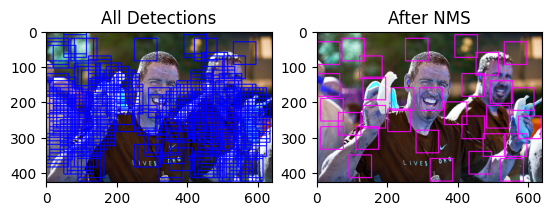

In [5]:
img= cv2.imread("coco1.jpg")
final = img.copy()

detections = []
confidences = []

(width, height)= (64,64)
windowSize=(width,height)
downscale=1.5

for scale, resized in enumerate(pyramid_gaussian(img, downscale=1.5)):
    for y in range(0, resized.shape[0] - height, 10):
        for x in range(0, resized.shape[1] - width, 10):
            window = resized[y: y + height, x: x + width]
            
            if window.shape[0] == height and window.shape[1] == width and window.shape[2] == 3:

                window = cv2.cvtColor((window*255).astype(np.uint8), cv2.COLOR_BGR2GRAY)  
                features = hog(window, orientations, pixels_per_cell, cells_per_block, block_norm='L2')
                features = features.reshape(1, -1)
                pred = model.predict(features)
                
                if pred == 1 and model.decision_function(features) > 0.8:
                    #print("Detection:: Location -> ({}, {})".format(x, y))
                    detections.append((int(x * (downscale**scale)), int(y * (downscale**scale)),
                                       int(width * (downscale**scale)),
                                       int(height * (downscale**scale))))
                    confidences.append(model.decision_function(features))

for box in detections:
    x, y, w, h = box
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

#Non-maximum suppression
# Convert detected boxes NumPy array
boxes = np.array([[d[0], d[1], d[2], d[3]] for d in detections], dtype=np.int32)
indices = cv2.dnn.NMSBoxes(boxes, np.array(confidences).ravel(), 0.1, 0.05)

for idx in indices:
    x, y, w, h = boxes[idx]
    cv2.rectangle(final, (x, y), (x + w, y + h), (255, 0, 255), thickness=2)

# Display the image with bounding boxes
plt.subplot(121), plt.imshow(img)
plt.title("All Detections")
plt.subplot(122), plt.imshow(final)
plt.title("After NMS")
plt.show()

### Facial landmarks with DLIB

- The dlib library is a versatile toolkit in computer vision that offers a powerful 68-point face detection and landmarks model. This model is widely recognized for its robustness and accuracy in identifying facial features.
- The primary attributes of the DLIB library are:

    - Face detection: The dlib 68-point model excels at locating faces within images and video. Owing to its high accuracy and inference speed, it is often used for applications such as facial recognition and emotion analysis. Utilizing its face detection capabilities, we can efficiently identify regions of interest containing faces without having to code almost anything.
    - Facial landmarks: A remarkable feature of this model is its ability to identify 68 distinct landmarks on a detected face. These landmarks encompass critical features like eyes, nose, mouth, and eyebrows. The precision of these landmark positions enables advanced facial analysis such as head pose estimation and facial expression recognition among various other applications.

In [1]:
!pip3 install dlib

  Using cached dlib-19.24.2.tar.gz (11.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for dlib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [90 lines of output]
      <string>:208: SyntaxWarning: invalid escape sequence '\('
      <string>:209: SyntaxWarning: invalid escape sequence '\('
      <string>:210: SyntaxWarning: invalid escape sequence '\('
      running bdist_wheel
      running build
      running build_ext
      Building extension for Python 3.12.2 (v3.12.2:6abddd9f6a, Feb  6 2024, 17:02:06) [Clang 13.0.0 (clang-1300.0.29.30)]
      Invoking CMake setup: 'cmake /private/var/folders/xj/8l_ygs2j78j5kdmlxmyjm_nc0000gn/T/pip-install-qfrfp5ef/dlib_5a6eaa958fdc4e61a48fa256934ad513/tools/python -DCMAKE_LIBRARY_OUTPUT_DIRECTORY=/private/var/folders/xj/8l_ygs2j78j5kdmlxmyjm_nc0000gn/T/pip-install-qfrfp5ef/dlib

In [6]:
import dlib
import cv2

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

image = cv2.imread("face.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image
faces = detector(gray)

# Loop over detected faces
for face in faces:
    # Predict the facial landmarks for each detected face
    landmarks = predictor(gray, face)

    cv2.rectangle(image, (face.left(), face.top()), (face.right(), face.bottom()), (0, 255, 0), 2)
    
    # Draw landmarks on image
    for point in landmarks.parts():
        cv2.circle(image, (point.x, point.y), 1, (0, 0, 255), -1)

cv2.imshow("Facial Landmarks and Rectangles", image)
cv2.imwrite("output_landmarks_rectangles.jpg", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

ModuleNotFoundError: No module named 'dlib'

### Object Tracking using OpenCV

- Object tracking is a task in computer vision that involves locating and following a specific object as it moves within a video.
- Object tracking involves identifying an initial target object in the first frame and then intelligently predicting its whereabouts in subsequent frames. Unlike object detection which identifies objects within a single frame, object tracking refers to following objects as they move in a video.
- Object tracking plays a vital role in various real-world applications. Some key areas where object tracking are:

    - Surveillance Systems: Object tracking is used to monitor and analyze the movement of people and objects in security cameras.
    - Autonomous Vehicles: Autonomous cars use object tracking to detect and follow other vehicles, pedestrians and obstacles on the road.
    - Robotics: Robots employ object tracking for tasks like picking and placing objects, navigation, and human-robot interaction.
    - Augmented Reality (AR): AR applications use object tracking to overlay virtual objects on real-world scenes, enhancing the user experience.
 
- The object tracking process typically consists of two steps:

    - Initialization: First we specify the initial bounding box that surrounds the object that we want to track. The object can be either manually defined by the user or an object detection technique can be used for the same.
    - Tracking Loop: Once the object is initialized, we enter a tracking loop. In each iteration of the loop we process a new frame from the video. The tracking algorithm updates the position of the object based on its previous location and appearance. The tracked object can be visualized by drawing a bounding box around it in each frame.
- 
- <u>The MIL (Multiple Instance Learning) Tracker</u> is an algorithm that pays attention to different patches of the target object in each video frame. By observing these patches over time, the tracker learns the various appearances of the object. This helps the tracker maintain accurate tracking of the object even when the object’s appearance changes due to factors like angles or occlusions.
- Some of the other object tracking algorithms in OpenCV are KLT (Kanade-Lucas-Tomasi) Tracking, CSRT (Discriminative Correlation Filter with Channel and Spatial Reliability) and MOSSE (Minimum Output Sum of Squared Error). The choice of algorithm depends on the specific use case. Feel free to explore these algorithms on your own accord.

In [ ]:
import cv2
from IPython.display import clear_output, Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Initialize our tracker object
tracker = cv2.TrackerMIL_create()

video = cv2.VideoCapture('car.mp4')
ret, frame = video.read()

# Instead of using cv2.selectROI, you need to specify the bbox coordinates
# For example: bbox = (x, y, width, height)
bbox = (1000,1350,300,300)

# Initialize tracker with first frame and the bounding box
tracker.init(frame, bbox)

try:
    while True:
        ret, frame = video.read()
        if not ret:
            break

        # Update the tracker to get the new bounding box
        success, bbox = tracker.update(frame)

        # Draw the bounding box
        if success:
            x, y, w, h = [int(val) for val in bbox]
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Convert to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Use matplotlib to display the image
        plt.imshow(frame_rgb)
        plt.axis('off')  # Turn off axis numbers
        # Draw the bounding box as a rectangle
        if success:
            plt.gca().add_patch(Rectangle((x, y), w, h, linewidth=2, edgecolor='g', facecolor='none'))
        
        # Display the image
        plt.show()
        
        # Clear the output after each frame
        clear_output(wait=True)

except KeyboardInterrupt:
    # Release video when the cell execution is stopped
    video.release()
    print("Stream stopped")

(Kernel died...) The output like this:
- <img src="object_tracking_output.png" width="500" height="400">

## Chap12. Projects using OpenCV
- Projects:
1. Automated book inventory system
2. Document scanning using OpenCV and OCR
3. Face recognition
4. Drowsiness detection

### 1. Automated book inventory system
- In this project, our goal is to create an efficient book management system. We will achieve this by employing a Python library to capture book data through QR code scanning. This approach will streamline the process of gathering book information automatically. The project will take a picture and all the necessary information about the book will be retrieved and stored automatically.
- We will harness the power of an external API to fetch comprehensive details about each book, including titles, authors, publication dates, and more. The retrieved data will allow us to maintain an organized and up-to-date inventory of our books. To enhance usability, we will store this valuable information in a user-friendly spreadsheet, making it accessible and manageable for our team.
- We will utilize the <u>PyZbar library</u> for QR code decoding in our project. This library efficiently locates QR codes within an image and scans them to extract valuable information, simplifying the process of data retrieval.

In [5]:
import pyzbar
print(pyzbar.__version__)

0.1.9


In [2]:
from pyzbar.pyzbar import decode


img = cv2.imread("book.jpg")

decoded_objects = decode(img)

for obj in decoded_objects:
    barcode_data = obj.data.decode('utf-8')
    barcode_type = obj.type
    print(f"Barcode Type: {barcode_type}, Data: {barcode_data}")

plt.imshow(img)
plt.title("barcode")
plt.show()

ImportError: Unable to find zbar shared library

* 始终不能正常安装pyzbar -> 且cv2.imshow()不适用于jupyter -> 尝试pyCharm (IDE)运行 -> pyCharm也不能使用pyzbar...

### 3. Face recognition

In [2]:
!pip3 install opencv-contrib-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 MB 3.0 MB/s eta 0:00:0000:0100:01m


In [13]:
import cv2
import os
import numpy as np

# List to store face samples and corresponding labels
faces = []
labels = []

# Provide the correct path to your data directory
data_dir = 'LFW_data/lfw-deepfunneled/lfw-deepfunneled/'

# Iterate through the subdirectories (each person's images)
for person_dir in os.listdir(data_dir):
    person_path = os.path.join(data_dir, person_dir)

    # Check if the current path is a directory
    if os.path.isdir(person_path):
        for image_name in os.listdir(person_path):
            image_path = os.path.join(person_path, image_name)

            # Check if the current path is an actual file to avoid hidden files like .DS_Store
            if os.path.isfile(image_path):
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                # Check if the image was loaded successfully
                if image is not None:
                    faces.append(image)
                    labels.append(label)

# Create LBPH face recognizer
recognizer = cv2.face.LBPHFaceRecognizer_create()

recognizer.train(faces, np.array(labels))

#recognizer.save('trained_model.xml')

test_image = cv2.imread('face.jpg', cv2.IMREAD_GRAYSCALE)

# Perform face recognition
label, confidence = recognizer.predict(test_image)

# Get the name corresponding to the predicted label
predicted_person = os.listdir(data_dir)[label]

cv2.putText(test_image, f"{predicted_person}", (0, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 1, cv2.LINE_AA)

print(f"Predicted person: {predicted_person}, Confidence: {confidence}")



Predicted person: .DS_Store, Confidence: 50.17292744658516


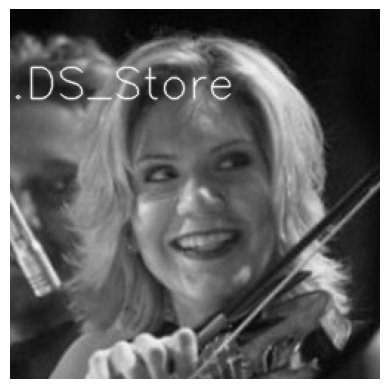

In [12]:
import matplotlib.pyplot as plt
import cv2

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))  # 如果是彩色图像，需要从BGR转换到RGB
plt.axis('off')  # 不显示坐标轴
plt.show()